In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from cycler import cycler
import requests
from pywaffle import Waffle
import numpy as np
import squarify
from textblob import TextBlob
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import math
from nltk.stem import WordNetLemmatizer

%matplotlib inline

In [3]:
plt.rcParams.update({
    'pdf.fonttype': 42,
    'axes.prop_cycle': cycler('color', ['#52bbb7', '#8fdeb4', '#f16764', '#ca4862', '#461d2d', '#9C2964', '#1B7EBE', '#E4C34A']),
    'ps.fonttype': 42,
    'grid.linestyle': '--',
    'axes.facecolor': '#8fdeb4',
    'figure.facecolor': '#8fdeb4',
    'axes.spines.left' : True,
    'axes.spines.right' : False,
    'axes.spines.top' : False,
    'axes.spines.bottom' : True,
    'font.family': 'sans',
    'font.sans-serif': 'RobotoCondensed-Bold',
    'font.serif': 'Lora-Regular',
    'axes.titlesize': 'x-large',
    'axes.titleweight': 'bold',
    'axes.grid': True,
    'grid.color': 'silver',
    'axes.axisbelow': True,
    'xtick.bottom' : False,
    'ytick.left' : False,
    'axes.titlepad' : 15.0,
    'legend.frameon' : False,
    'ytick.labelsize': 15,
    'xtick.labelsize': 15,
    'axes.titlesize': 30,
    'text.color': 'whitesmoke',
    'axes.labelcolor': '#9C2964',
    'xtick.color': 'gray',
    'ytick.color': 'gray'
    
})

In [4]:
df = pd.read_csv('all-ufo-sightings-thru-08-06-2018.csv')

In [19]:
df.shape

(116394, 13)

In [5]:
df.seen_at = pd.to_datetime(df.seen_at)

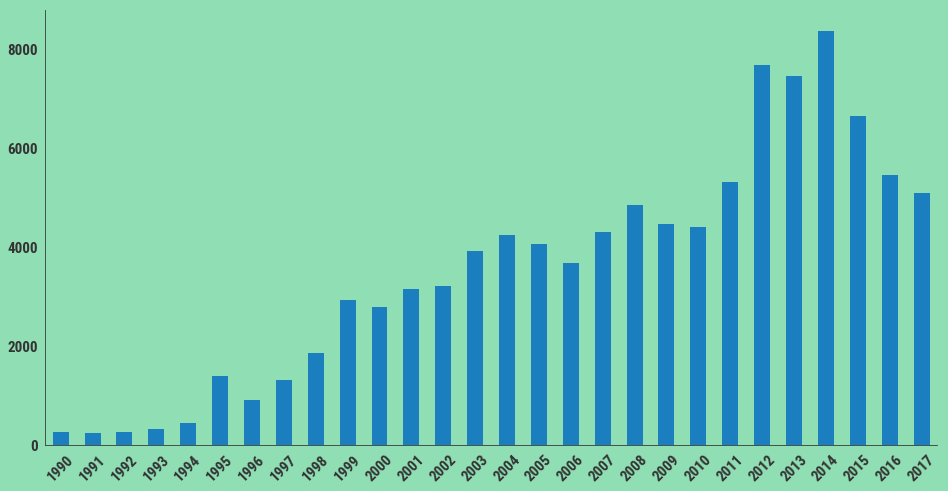

In [22]:
fig, ax = plt.subplots(facecolor='#8fdeb4')

ax = df[(df.seen_at.dt.year > 1989) & (df.seen_at.dt.year < 2018)].resample('A', on='seen_at').state.count().plot(kind='bar',figsize=(16,8), color='#1B7EBE')

bar_labels = range(1990,2018)

ax.grid(False)
ax.set_ylabel('')
ax.set_xlabel('')
#ax.set_title('Reported UFO sightings per year', fontdict={'color':'#9C2964'}, loc='left')
ax.set_xticklabels(labels=bar_labels, color='#333333')
ax.set_yticklabels(labels=[0,'',2000, '', 4000, '', 6000, '', 8000], color='#333333')

ax.spines['bottom'].set_color('#333333')
ax.spines['left'].set_color('#333333')

for tick in ax.get_xticklabels():
    tick.set_rotation(45)

plt.savefig('reported-ufo-sightings-revision-1.svg', facecolor=fig.get_facecolor(), transparent=True, bbox_inches='tight')

In [22]:
df_text = pd.DataFrame(df.text.values)

In [23]:
df_text['seen_at'] = df.seen_at.values

In [24]:
df_text.head()
df_text.rename({0:'description'}, axis=1, inplace=True)

In [25]:
def tokenize(s):
    blob = TextBlob(s.lower())
    words = [token for token in blob.words if token.isalpha() == True and len(token)>3]
    return words

In [26]:
df_text.dropna(how='any', inplace=True)

In [27]:
df_text['year'] = df_text['seen_at'].dt.year

In [28]:
df_text['year'] = df_text.year.astype(int)

In [29]:
wordnet_lemmatizer = WordNetLemmatizer()

In [30]:
vectorizer = TfidfVectorizer(stop_words='english', tokenizer=tokenize)

matrix = vectorizer.fit_transform(df_text.description)

tfidf = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names())
tfidf.head()

,aaaa,aaaaaaahhh,aaaaah,aaahh,aaahhhed,aaahs,aaanndd,aabout,aachen,aack,...,öbject,örsundsbro,östergötaland,över,últimos,útil,über,überzeugen,švie,žmoni
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
def print_sorted_vector(v):
    # this "lambda" thing is an anonymous function, google me to unluck bonus coding knowledge
    sorted_list = sorted(v.items(), key=lambda x: (x[1],x[0]), reverse=True) 
    sorted_list = sorted_list[:20]
    print('\n'.join([str(x) for x in sorted_list]))

In [3]:
def split(df, chunkSize = 1000):
    numberChunks = len(df) // chunkSize + 1
    return np.array_split(df, numberChunks, axis=0)

In [4]:
split_tfidfs = split(tfidf)

NameError: name 'tfidf' is not defined

In [1]:
split_tfidfs[0]

NameError: name 'split_tfidfs' is not defined

In [42]:
sums = []

def sum_rows(split_tfidfs):
    for tfidf in split_tfidfs:
        summed_tfidf = tfidf.groupby('year').sum(axis=0)
        sums.append(summed_tfidf)
    

In [43]:
sum_rows(split_tfidfs)

KeyError: 'year'

In [ ]:
print_sorted_vector(tfidf2_sums)

In [ ]:
sums = tfidf.sum(axis=0)

In [40]:
df_text.dtypes

description            object
seen_at        datetime64[ns]
year                    int64
dtype: object